In [40]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [41]:
cd drive/MyDrive/Fashion MNIST Classification

[Errno 2] No such file or directory: 'drive/MyDrive/Fashion MNIST Classification'
/content
/content/drive/MyDrive/Fashion MNIST Classification


In [42]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import keras

In [43]:
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [44]:
X_train.shape, y_train.shape, "******", X_test.shape, y_test.shape

((60000, 28, 28), (60000,), '******', (10000, 28, 28), (10000,))

((60000, 28, 28), (60000,), '******', (10000, 28, 28), (10000,))

In [45]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [46]:
y_train[0]

9

9

In [47]:
class_labels = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

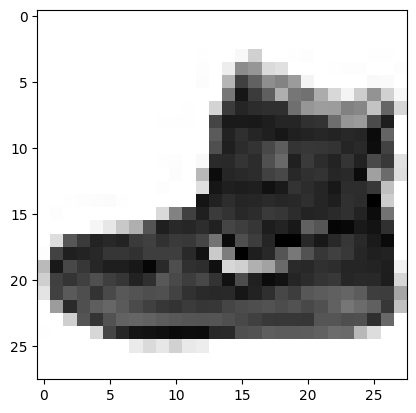

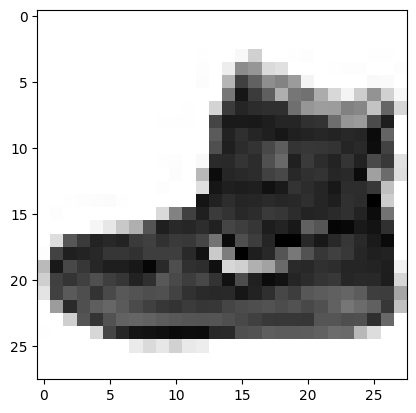

In [48]:
plt.imshow(X_train[0], cmap='Greys')

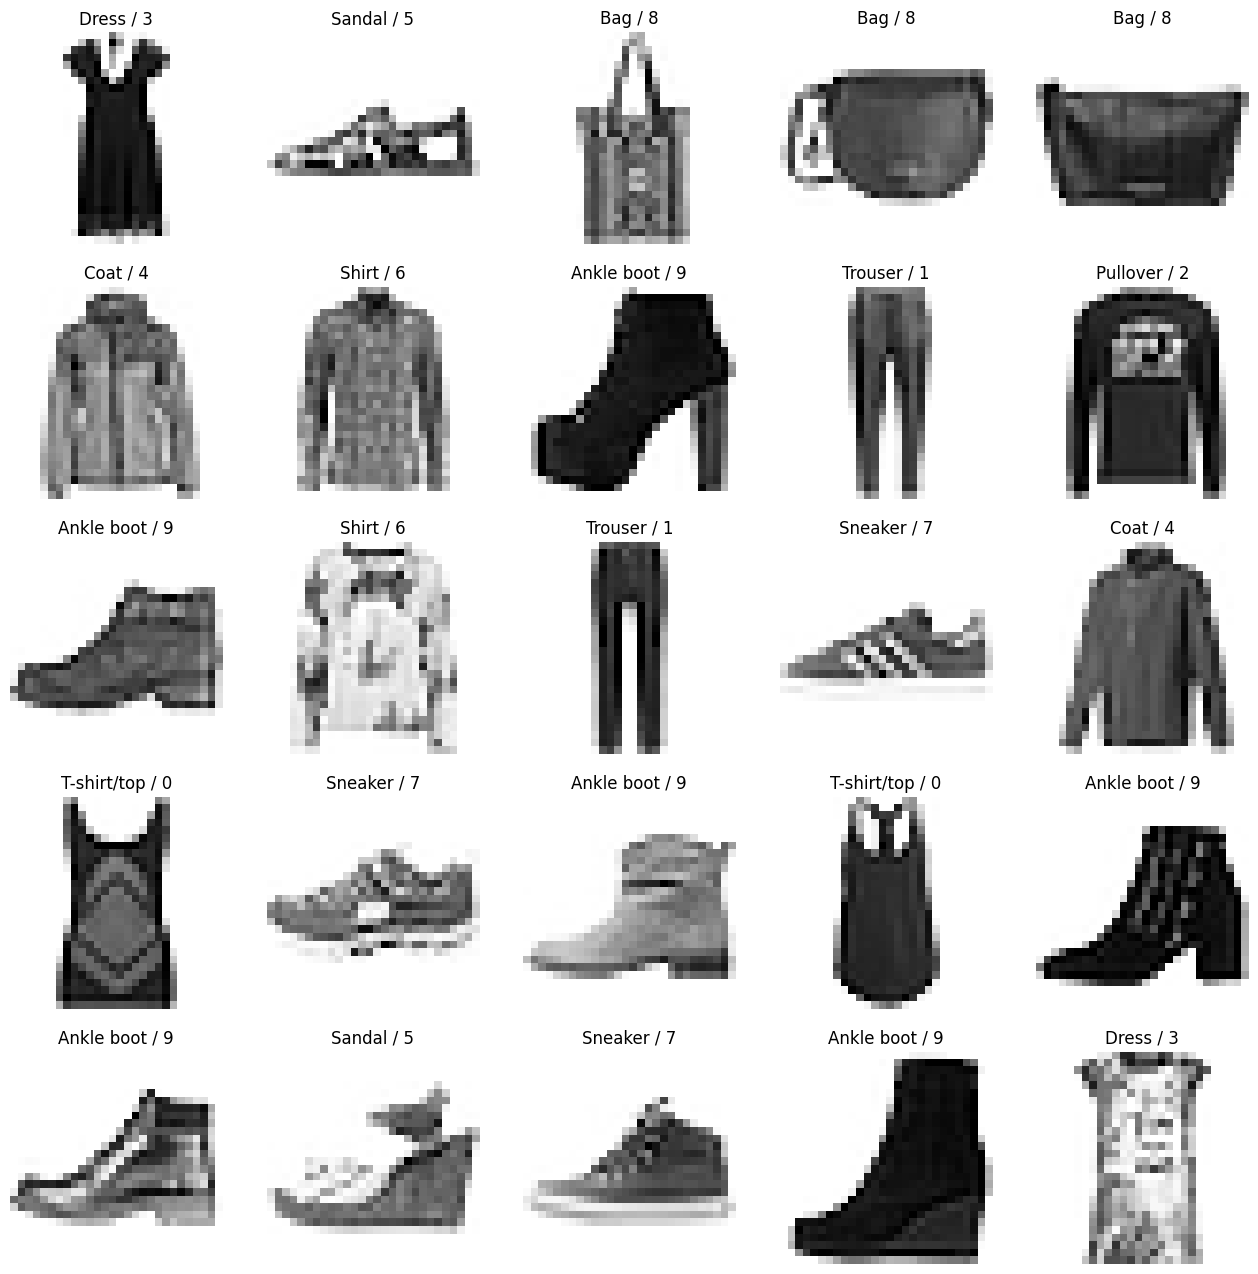

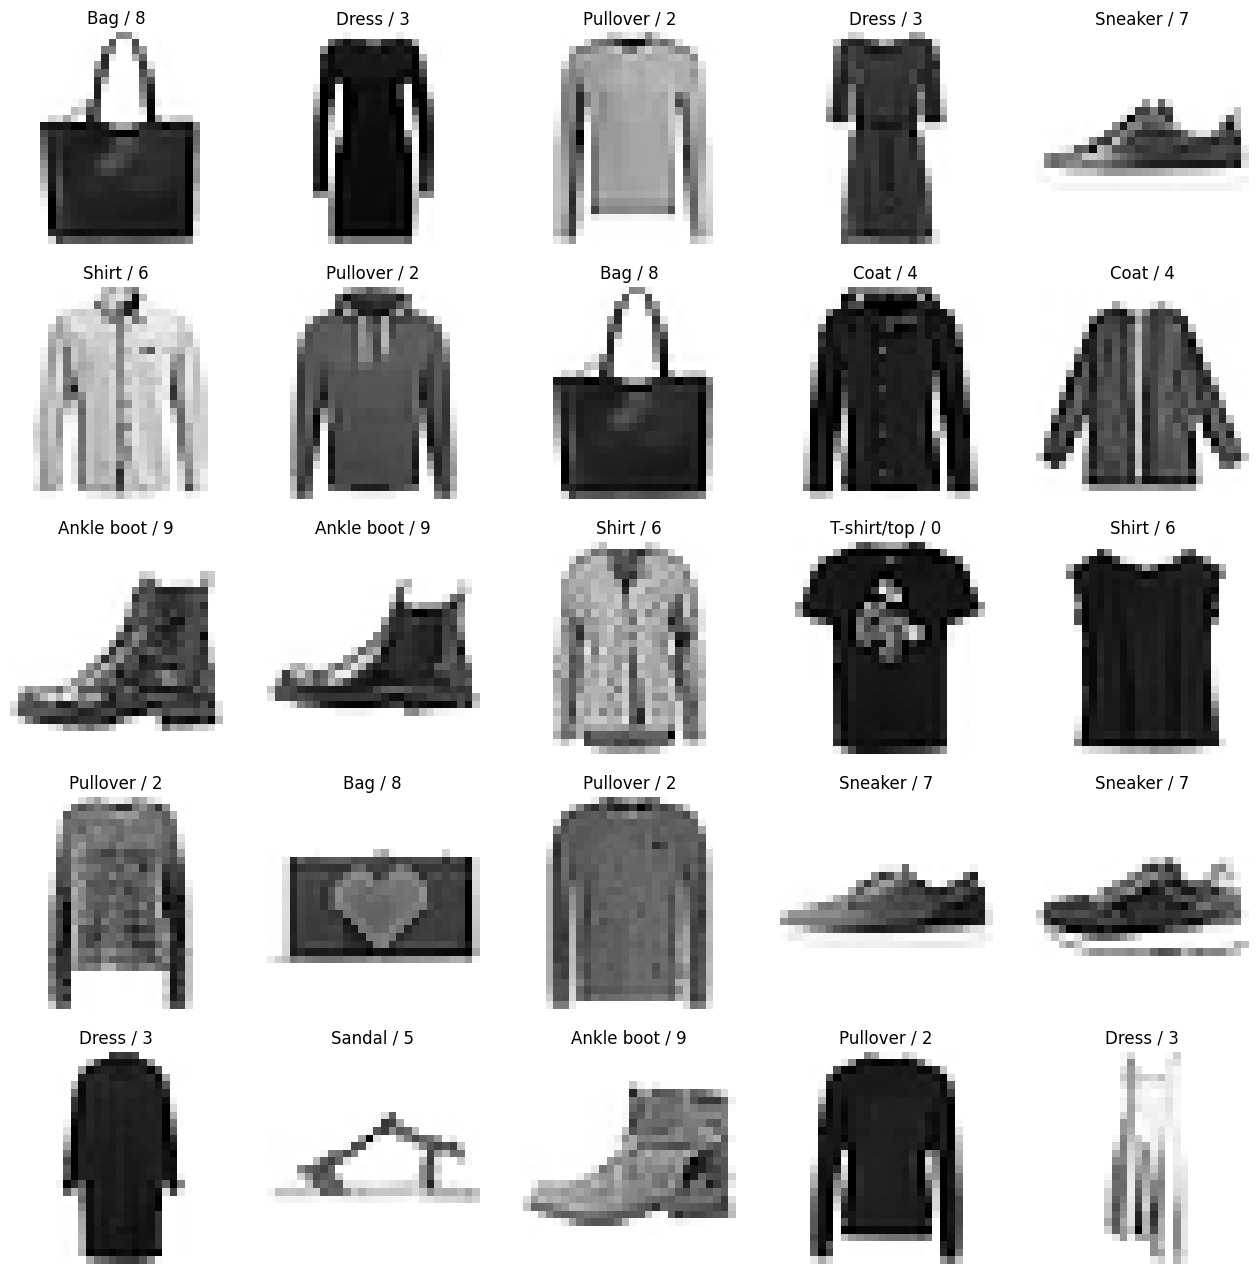

In [49]:
plt.figure(figsize=(16,16))
j=1
for i in np.random.randint(0, 1000, 25):
  plt.subplot(5,5,j); j+=1
  plt.imshow(X_train[i], cmap="Greys")
  plt.axis('off') # off the axis
  plt.title('{} / {}'.format(class_labels[y_train[i]], y_train[i]))


In [50]:
X_train.shape

(60000, 28, 28)

(60000, 28, 28)

In [51]:
X_train.ndim

3

3

In [52]:
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

In [53]:
X_train.ndim

4

4

In [54]:
X_train = X_train/255
X_test = X_test/255

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size= 0.2, random_state=2020)

In [56]:
X_train.shape,  y_train.shape, X_validation.shape, y_validation.shape

((48000, 28, 28, 1), (48000,), (12000, 28, 28, 1), (12000,))

((48000, 28, 28, 1), (48000,), (12000, 28, 28, 1), (12000,))

In [57]:
#Building CNN model
cnn_model = keras.models.Sequential([
                         keras.layers.Conv2D(filters=32, kernel_size=3, strides=(1,1), padding='valid',activation= 'relu', input_shape=[28,28,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dense(units=10, activation='softmax')
])

In [58]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693962 (2.65 MB)
Trainable params: 693962 (2.65 MB)
Non-trainable params: 0 (0.00 Byte)
____________________

In [59]:
cnn_model.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [60]:
cnn_model.fit(X_train, y_train, epochs=50, batch_size=512, verbose=1, validation_data=(X_validation, y_validation))

Epoch 1/50
94/94 [==============================] - 20s 25ms/step - loss: 0.6412 - accuracy: 0.7857 - val_loss: 0.4386 - val_accuracy: 0.8478
Epoch 2/50
94/94 [==============================] - 1s 14ms/step - loss: 0.3827 - accuracy: 0.8654 - val_loss: 0.3717 - val_accuracy: 0.8702
Epoch 3/50
94/94 [==============================] - 1s 13ms/step - loss: 0.3355 - accuracy: 0.8825 - val_loss: 0.3402 - val_accuracy: 0.8835
Epoch 4/50
94/94 [==============================] - 1s 16ms/step - loss: 0.3084 - accuracy: 0.8916 - val_loss: 0.3218 - val_accuracy: 0.8877
Epoch 5/50
94/94 [==============================] - 2s 16ms/step - loss: 0.2849 - accuracy: 0.8990 - val_loss: 0.3026 - val_accuracy: 0.8966
Epoch 6/50
94/94 [==============================] - 1s 13ms/step - loss: 0.2704 - accuracy: 0.9029 - val_loss: 0.2962 - val_accuracy: 0.8994
Epoch 7/50
94/94 [==============================] - 2s 17ms/step - loss: 0.2504 - accuracy: 0.9110 - val_loss: 0.2864 - val_accuracy: 0.8997
Epoch 8/50
9

Epoch 1/50
94/94 [==============================] - 2s 11ms/step - loss: 0.6404 - accuracy: 0.7792 - val_loss: 0.4253 - val_accuracy: 0.8539
Epoch 2/50
94/94 [==============================] - 1s 8ms/step - loss: 0.3873 - accuracy: 0.8650 - val_loss: 0.3701 - val_accuracy: 0.8727
Epoch 3/50
94/94 [==============================] - 1s 8ms/step - loss: 0.3333 - accuracy: 0.8837 - val_loss: 0.3359 - val_accuracy: 0.8854
Epoch 4/50
94/94 [==============================] - 1s 7ms/step - loss: 0.3062 - accuracy: 0.8909 - val_loss: 0.3196 - val_accuracy: 0.8890
Epoch 5/50
94/94 [==============================] - 1s 9ms/step - loss: 0.2838 - accuracy: 0.8999 - val_loss: 0.3049 - val_accuracy: 0.8936
Epoch 6/50
94/94 [==============================] - 1s 8ms/step - loss: 0.2692 - accuracy: 0.9050 - val_loss: 0.2953 - val_accuracy: 0.8963
Epoch 7/50
94/94 [==============================] - 1s 9ms/step - loss: 0.2517 - accuracy: 0.9102 - val_loss: 0.2912 - val_accuracy: 0.8977
Epoch 8/50
94/94 [=

In [61]:
y_pred = cnn_model.predict(X_test)
y_pred.round(2)

313/313 [==============================] - 1s 2ms/step


array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

313/313 [==============================] - 1s 2ms/step


array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [62]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [63]:
cnn_model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3899 - accuracy: 0.9105


[0.3898875117301941, 0.9104999899864197]

313/313 [==============================] - 1s 4ms/step - loss: 0.3724 - accuracy: 0.9101


[0.37240132689476013, 0.910099983215332]

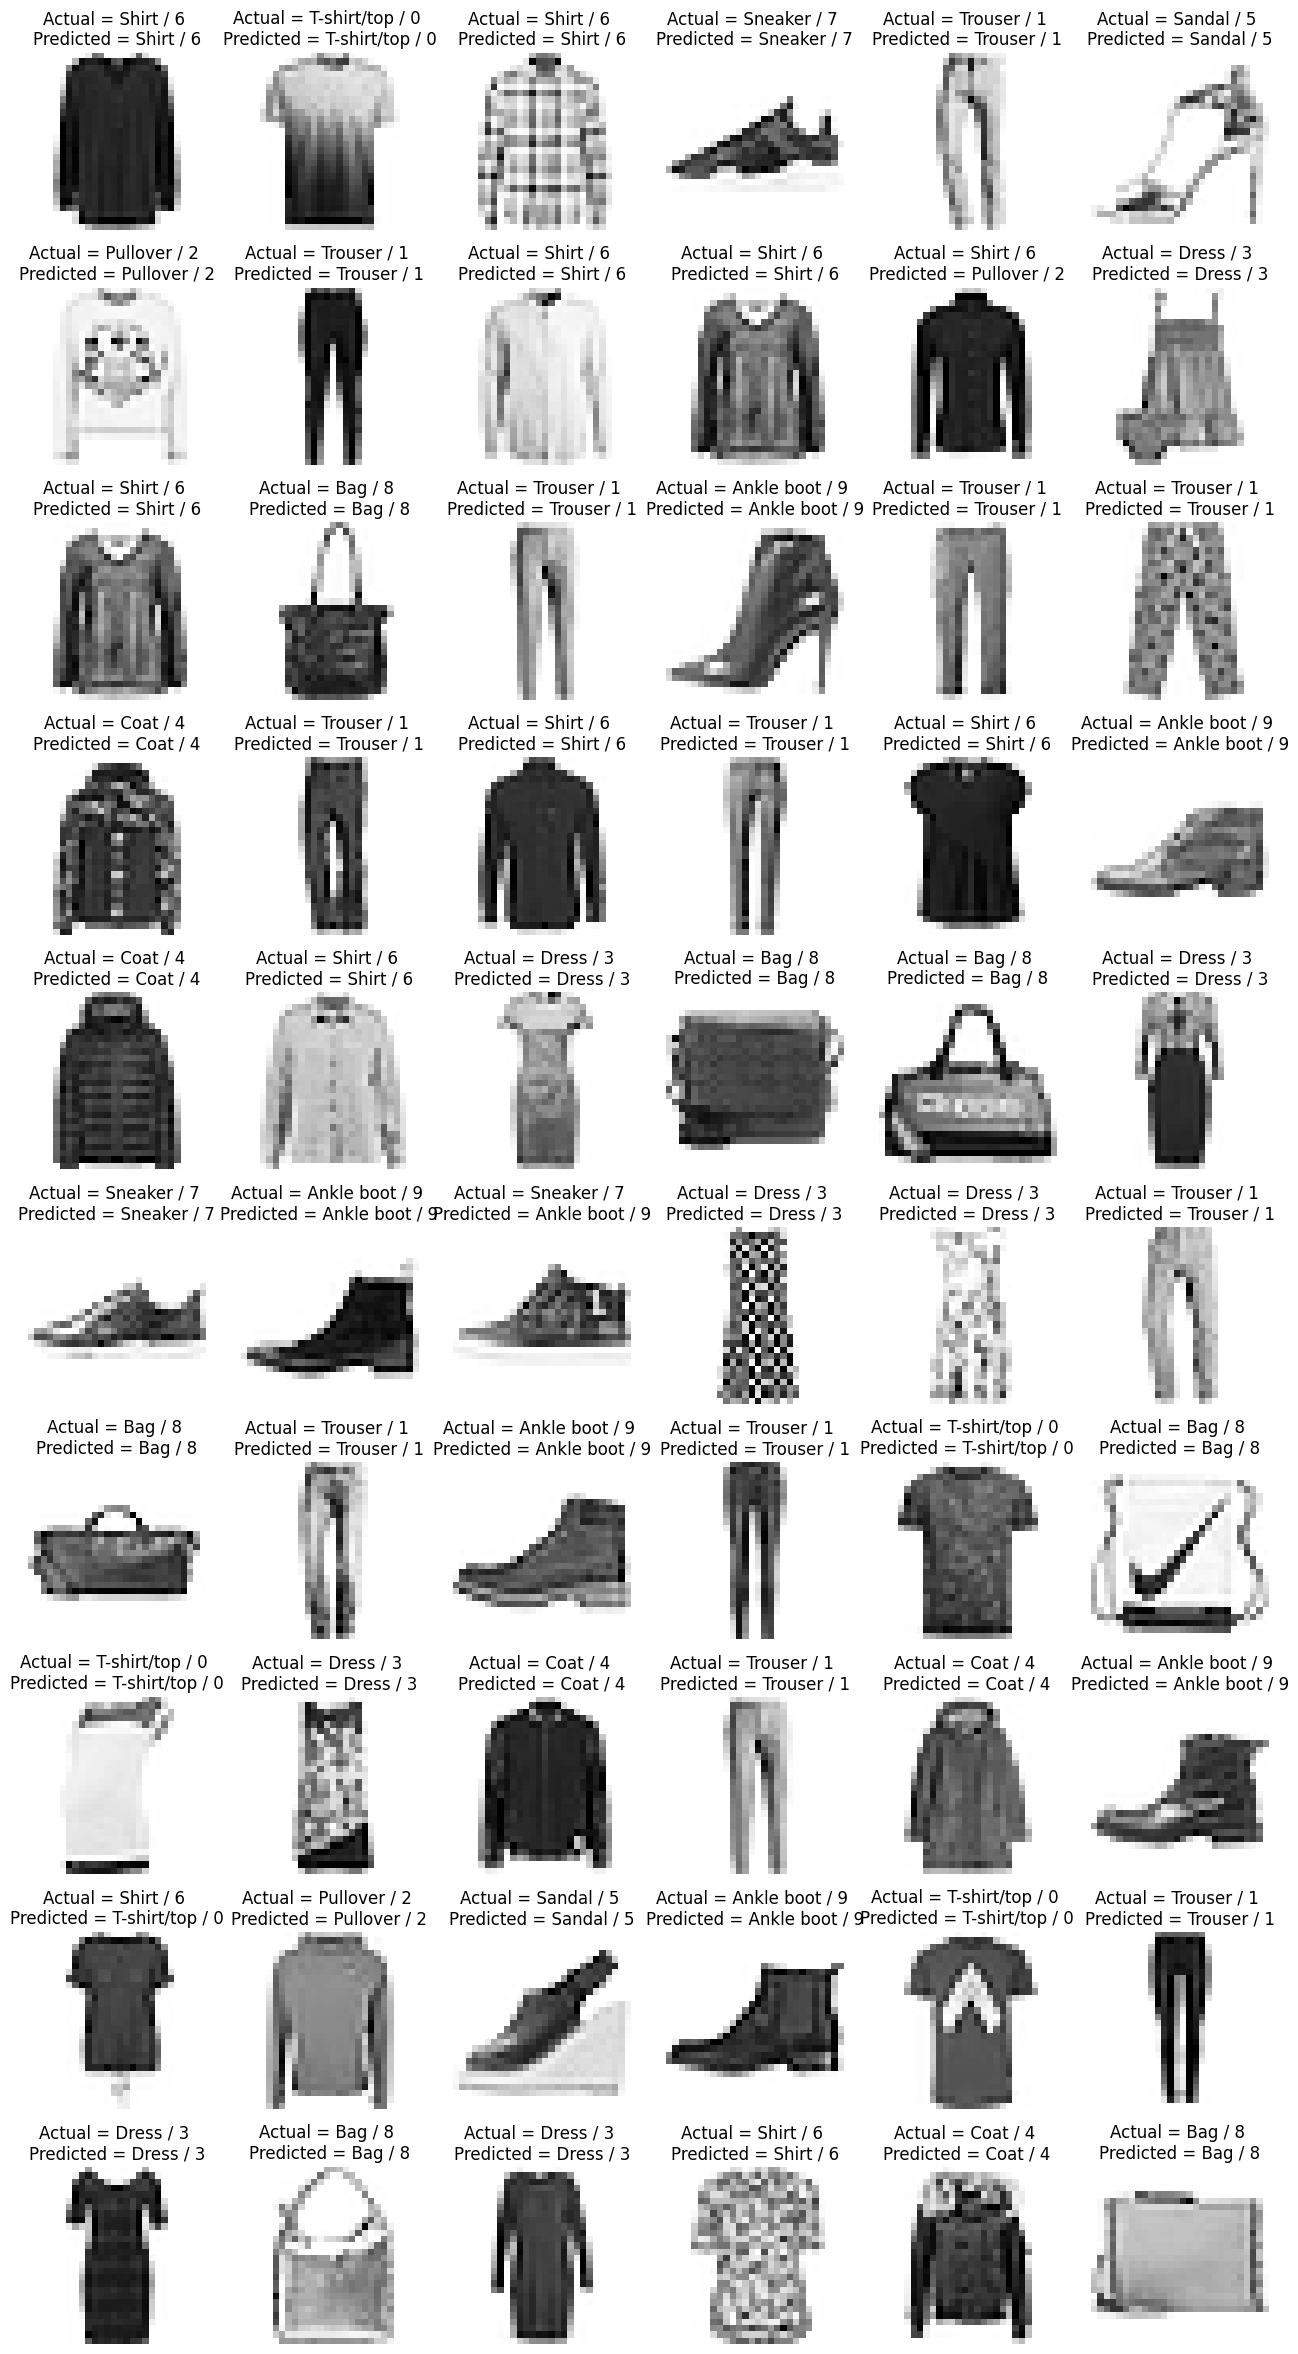

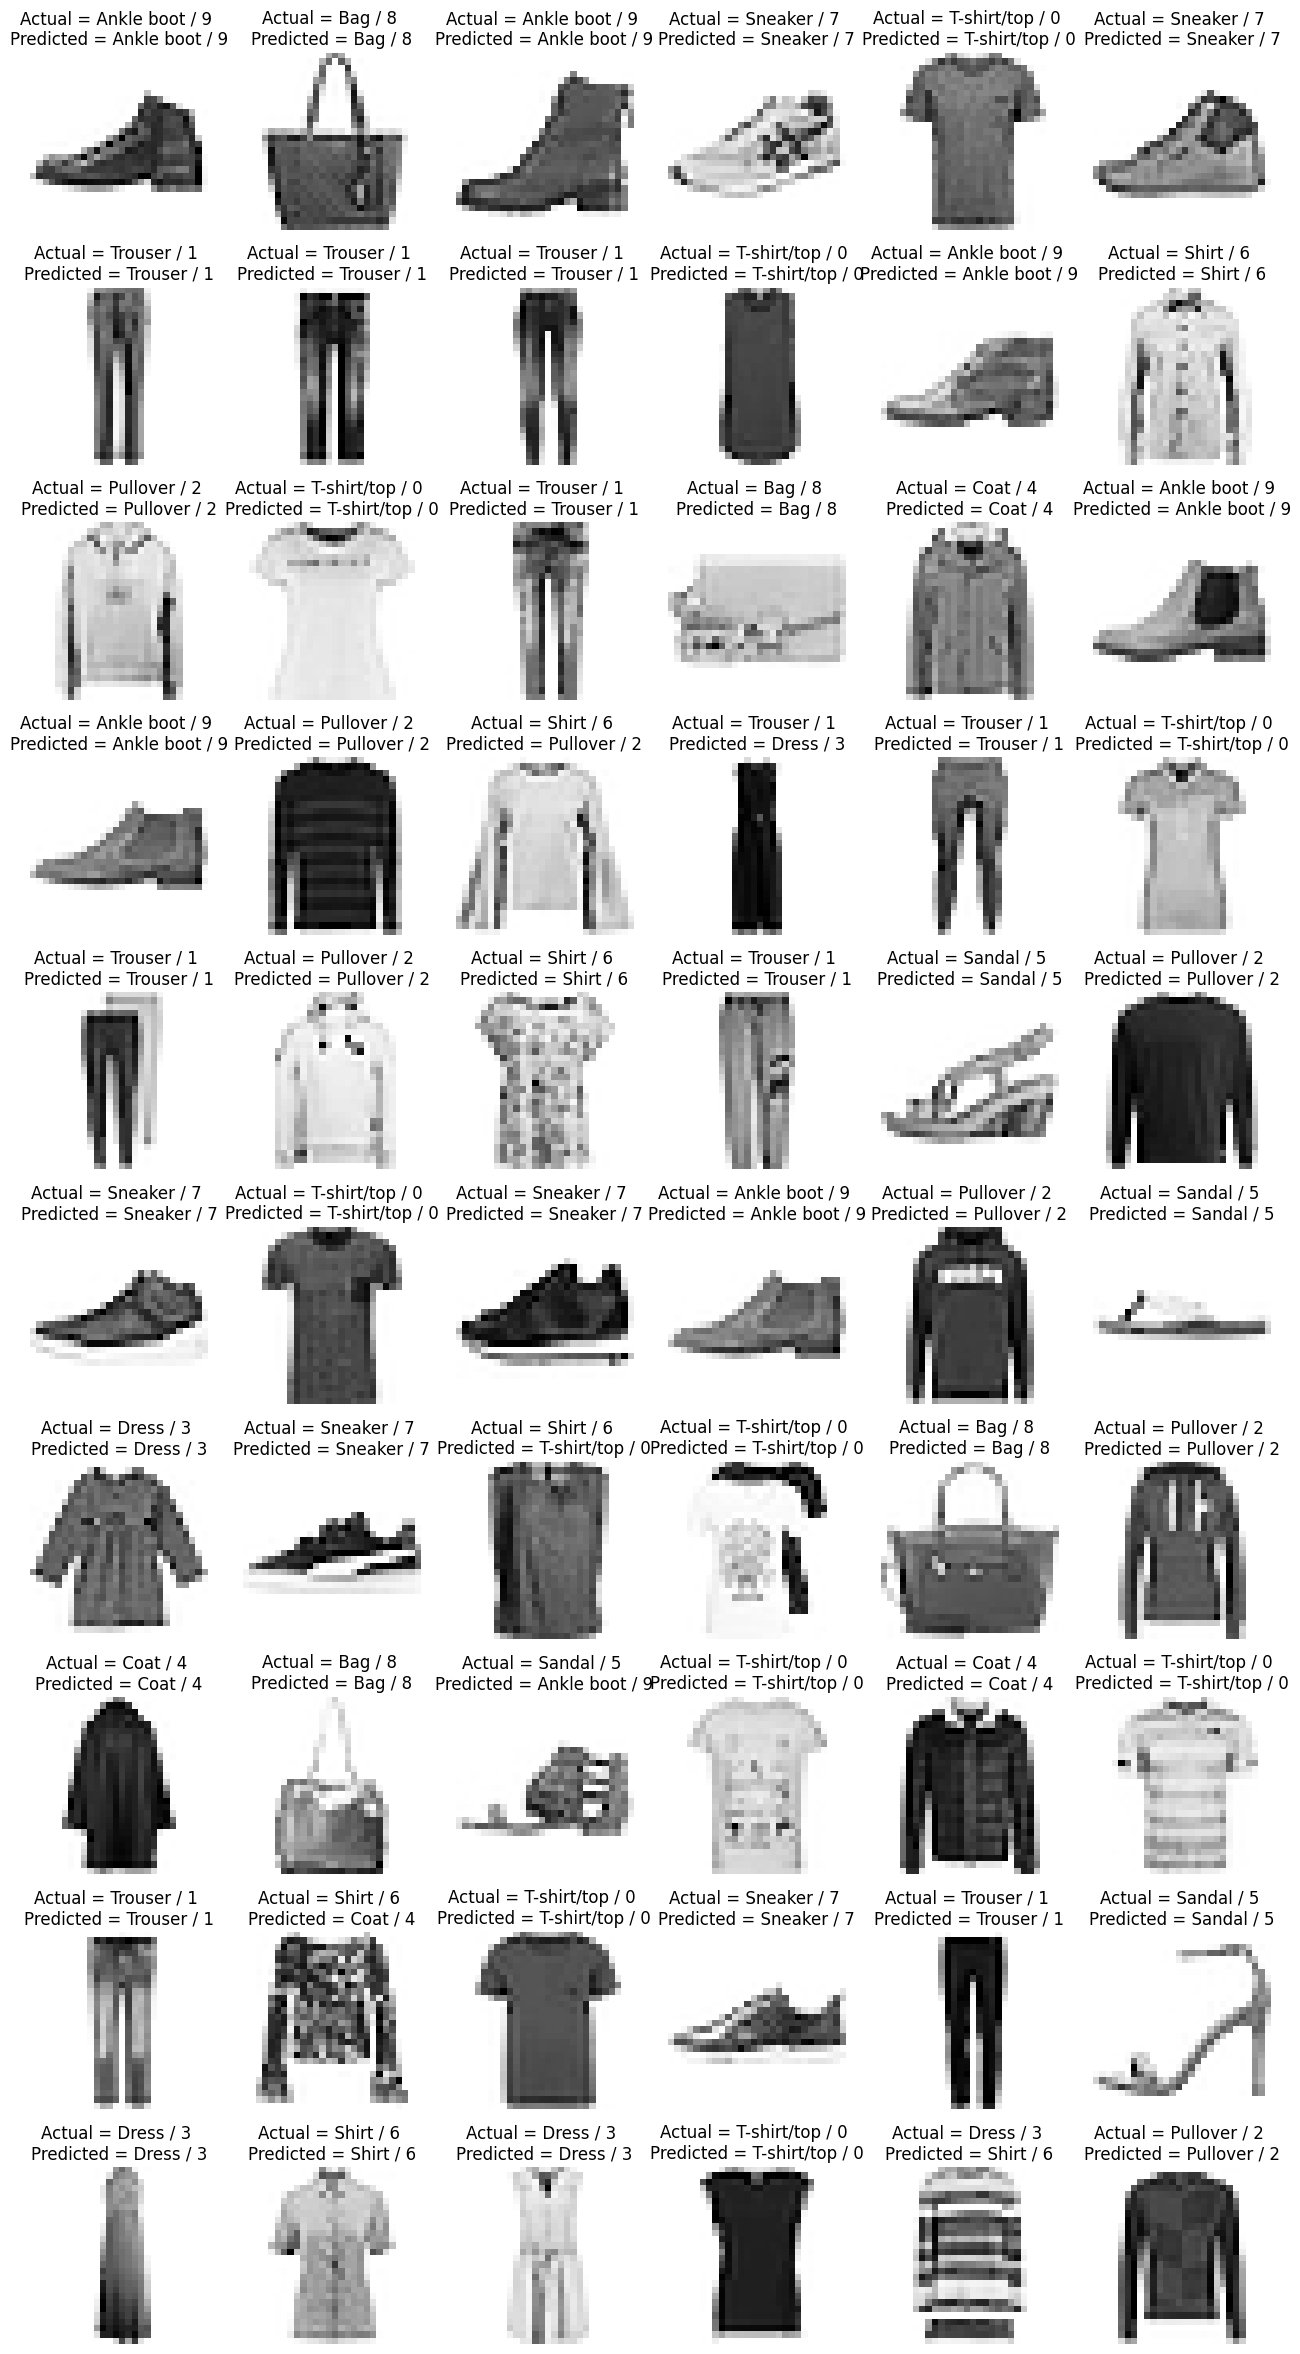

In [64]:
plt.figure(figsize=(16,30))

j=1
for i in np.random.randint(0, 1000,60):
  plt.subplot(10,6, j); j+=1
  plt.imshow(X_test[i].reshape(28,28), cmap = 'Greys')
  plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(class_labels[y_test[i]], y_test[i], class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
  plt.axis('off')

<Axes: >

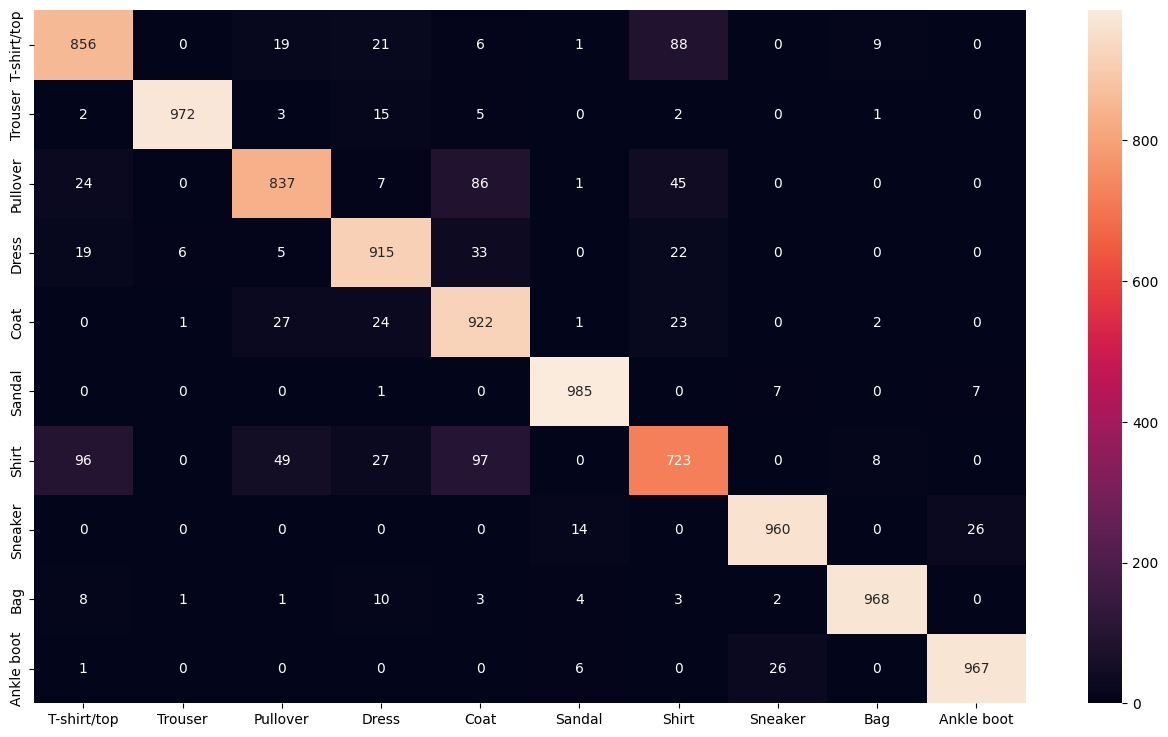

<Axes: >

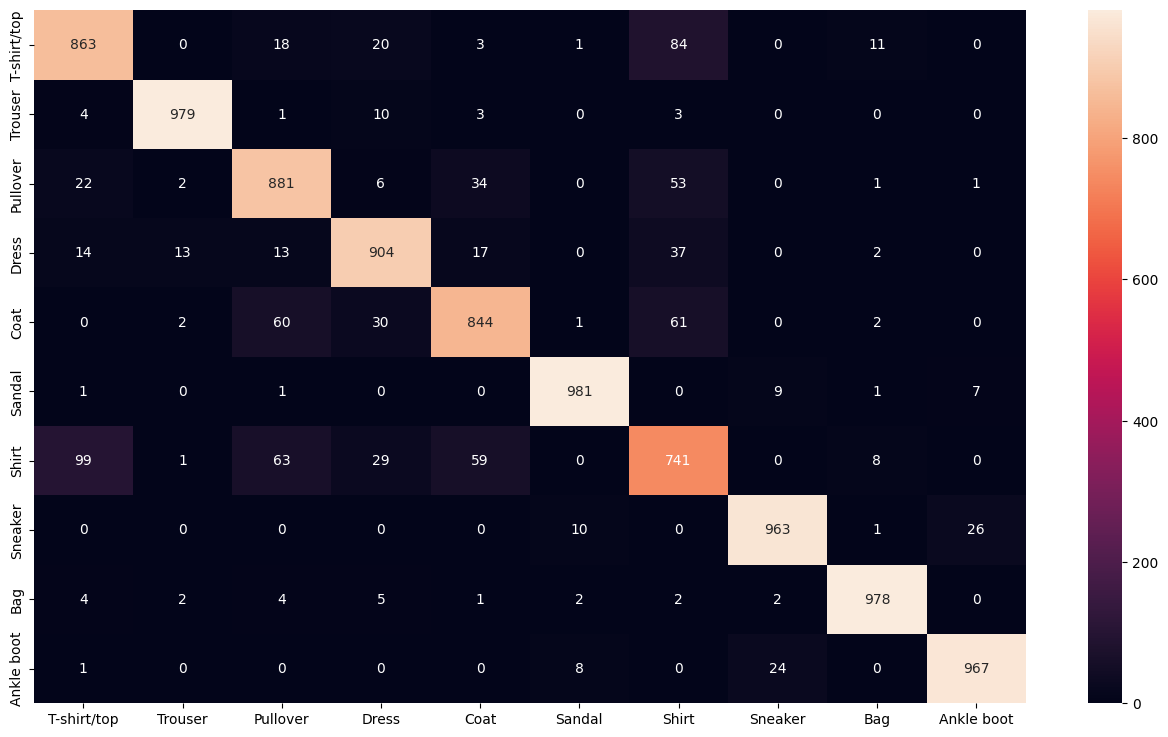

In [65]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(16,9))
y_pred_labels = [ np.argmax(label) for label in y_pred ]
cm = confusion_matrix(y_test, y_pred_labels)

# show cm
sns.heatmap(cm, annot=True, fmt='d',xticklabels=class_labels, yticklabels=class_labels)

In [66]:
from sklearn.metrics import classification_report
cr= classification_report(y_test, y_pred_labels, target_names=class_labels)
print(cr)

              precision    recall  f1-score   support

 T-shirt/top       0.85      0.86      0.85      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.89      0.84      0.86      1000
       Dress       0.90      0.92      0.91      1000
        Coat       0.80      0.92      0.86      1000
      Sandal       0.97      0.98      0.98      1000
       Shirt       0.80      0.72      0.76      1000
     Sneaker       0.96      0.96      0.96      1000
         Bag       0.98      0.97      0.97      1000
  Ankle boot       0.97      0.97      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000

              precision    recall  f1-score   support

 T-shirt/top       0.86      0.86      0.86      1000
     Trouser       0.98      0.98      0.98      1000
    Pullover       0.85      0.88      0.86      1000
       Dress       0.90 

In [67]:
cnn_model.save('fashion_mnist_cnn_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [68]:
fashion_mnist_cnn_model = keras.models.load_model('fashion_mnist_cnn_model.h5')

In [69]:
Y_pred_sample = fashion_mnist_cnn_model.predict(np.expand_dims(X_test[0], axis=0)).round(2)
Y_pred_sample

1/1 [==============================] - 0s 80ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

1/1 [==============================] - 0s 52ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [70]:
np.argmax(Y_pred_sample[0])

9

9

In [71]:
y_test[0]

9

9

In [72]:
cnn_model2 = keras.models.Sequential([
                        keras.layers.Conv2D(filters=32, kernel_size=3, strides=(1,1), padding='valid',activation= 'relu', input_shape=[28,28,1]),
                        keras.layers.MaxPooling2D(pool_size=(2,2)),
                        keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                        keras.layers.MaxPooling2D(pool_size=(2,2)),
                        keras.layers.Flatten(),
                        keras.layers.Dense(units=128, activation='relu'),
                        keras.layers.Dropout(0.25),
                        keras.layers.Dense(units=256, activation='relu'),
                        keras.layers.Dropout(0.25),
                        keras.layers.Dense(units=128, activation='relu'),
                        keras.layers.Dense(units=10, activation='softmax')
                        ])

In [73]:
cnn_model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 64)          18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 3, 3, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 576)               0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [74]:
cnn_model2.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [75]:
cnn_model2.fit(X_train, y_train, epochs=50, batch_size=512, verbose=1, validation_data=(X_validation, y_validation))

Epoch 1/50
94/94 [==============================] - 4s 14ms/step - loss: 1.0234 - accuracy: 0.6232 - val_loss: 0.5740 - val_accuracy: 0.7794
Epoch 2/50
94/94 [==============================] - 1s 9ms/step - loss: 0.5357 - accuracy: 0.7992 - val_loss: 0.4394 - val_accuracy: 0.8392
Epoch 3/50
94/94 [==============================] - 1s 9ms/step - loss: 0.4397 - accuracy: 0.8389 - val_loss: 0.3815 - val_accuracy: 0.8597
Epoch 4/50
94/94 [==============================] - 1s 9ms/step - loss: 0.3879 - accuracy: 0.8584 - val_loss: 0.3590 - val_accuracy: 0.8673
Epoch 5/50
94/94 [==============================] - 1s 10ms/step - loss: 0.3505 - accuracy: 0.8714 - val_loss: 0.3279 - val_accuracy: 0.8768
Epoch 6/50
94/94 [==============================] - 1s 9ms/step - loss: 0.3309 - accuracy: 0.8788 - val_loss: 0.3187 - val_accuracy: 0.8824
Epoch 7/50
94/94 [==============================] - 1s 10ms/step - loss: 0.3108 - accuracy: 0.8858 - val_loss: 0.3031 - val_accuracy: 0.8883
Epoch 8/50
94/94 

Epoch 1/50
94/94 [==============================] - 3s 13ms/step - loss: 1.0835 - accuracy: 0.5909 - val_loss: 0.6107 - val_accuracy: 0.7655
Epoch 2/50
94/94 [==============================] - 1s 9ms/step - loss: 0.5827 - accuracy: 0.7799 - val_loss: 0.4783 - val_accuracy: 0.8200
Epoch 3/50
94/94 [==============================] - 1s 9ms/step - loss: 0.4892 - accuracy: 0.8179 - val_loss: 0.4334 - val_accuracy: 0.8409
Epoch 4/50
94/94 [==============================] - 1s 10ms/step - loss: 0.4281 - accuracy: 0.8441 - val_loss: 0.3817 - val_accuracy: 0.8596
Epoch 5/50
94/94 [==============================] - 1s 11ms/step - loss: 0.3905 - accuracy: 0.8563 - val_loss: 0.3549 - val_accuracy: 0.8687
Epoch 6/50
94/94 [==============================] - 1s 10ms/step - loss: 0.3608 - accuracy: 0.8688 - val_loss: 0.3341 - val_accuracy: 0.8768
Epoch 7/50
94/94 [==============================] - 1s 11ms/step - loss: 0.3381 - accuracy: 0.8769 - val_loss: 0.3269 - val_accuracy: 0.8791
Epoch 8/50
94/9

In [95]:
y_pred = cnn_model2.predict(X_test)
y_pred.round(2)

313/313 [==============================] - 1s 2ms/step


array([[0.  , 0.  , 0.  , ..., 0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.99, 0.  , 0.  ]], dtype=float32)

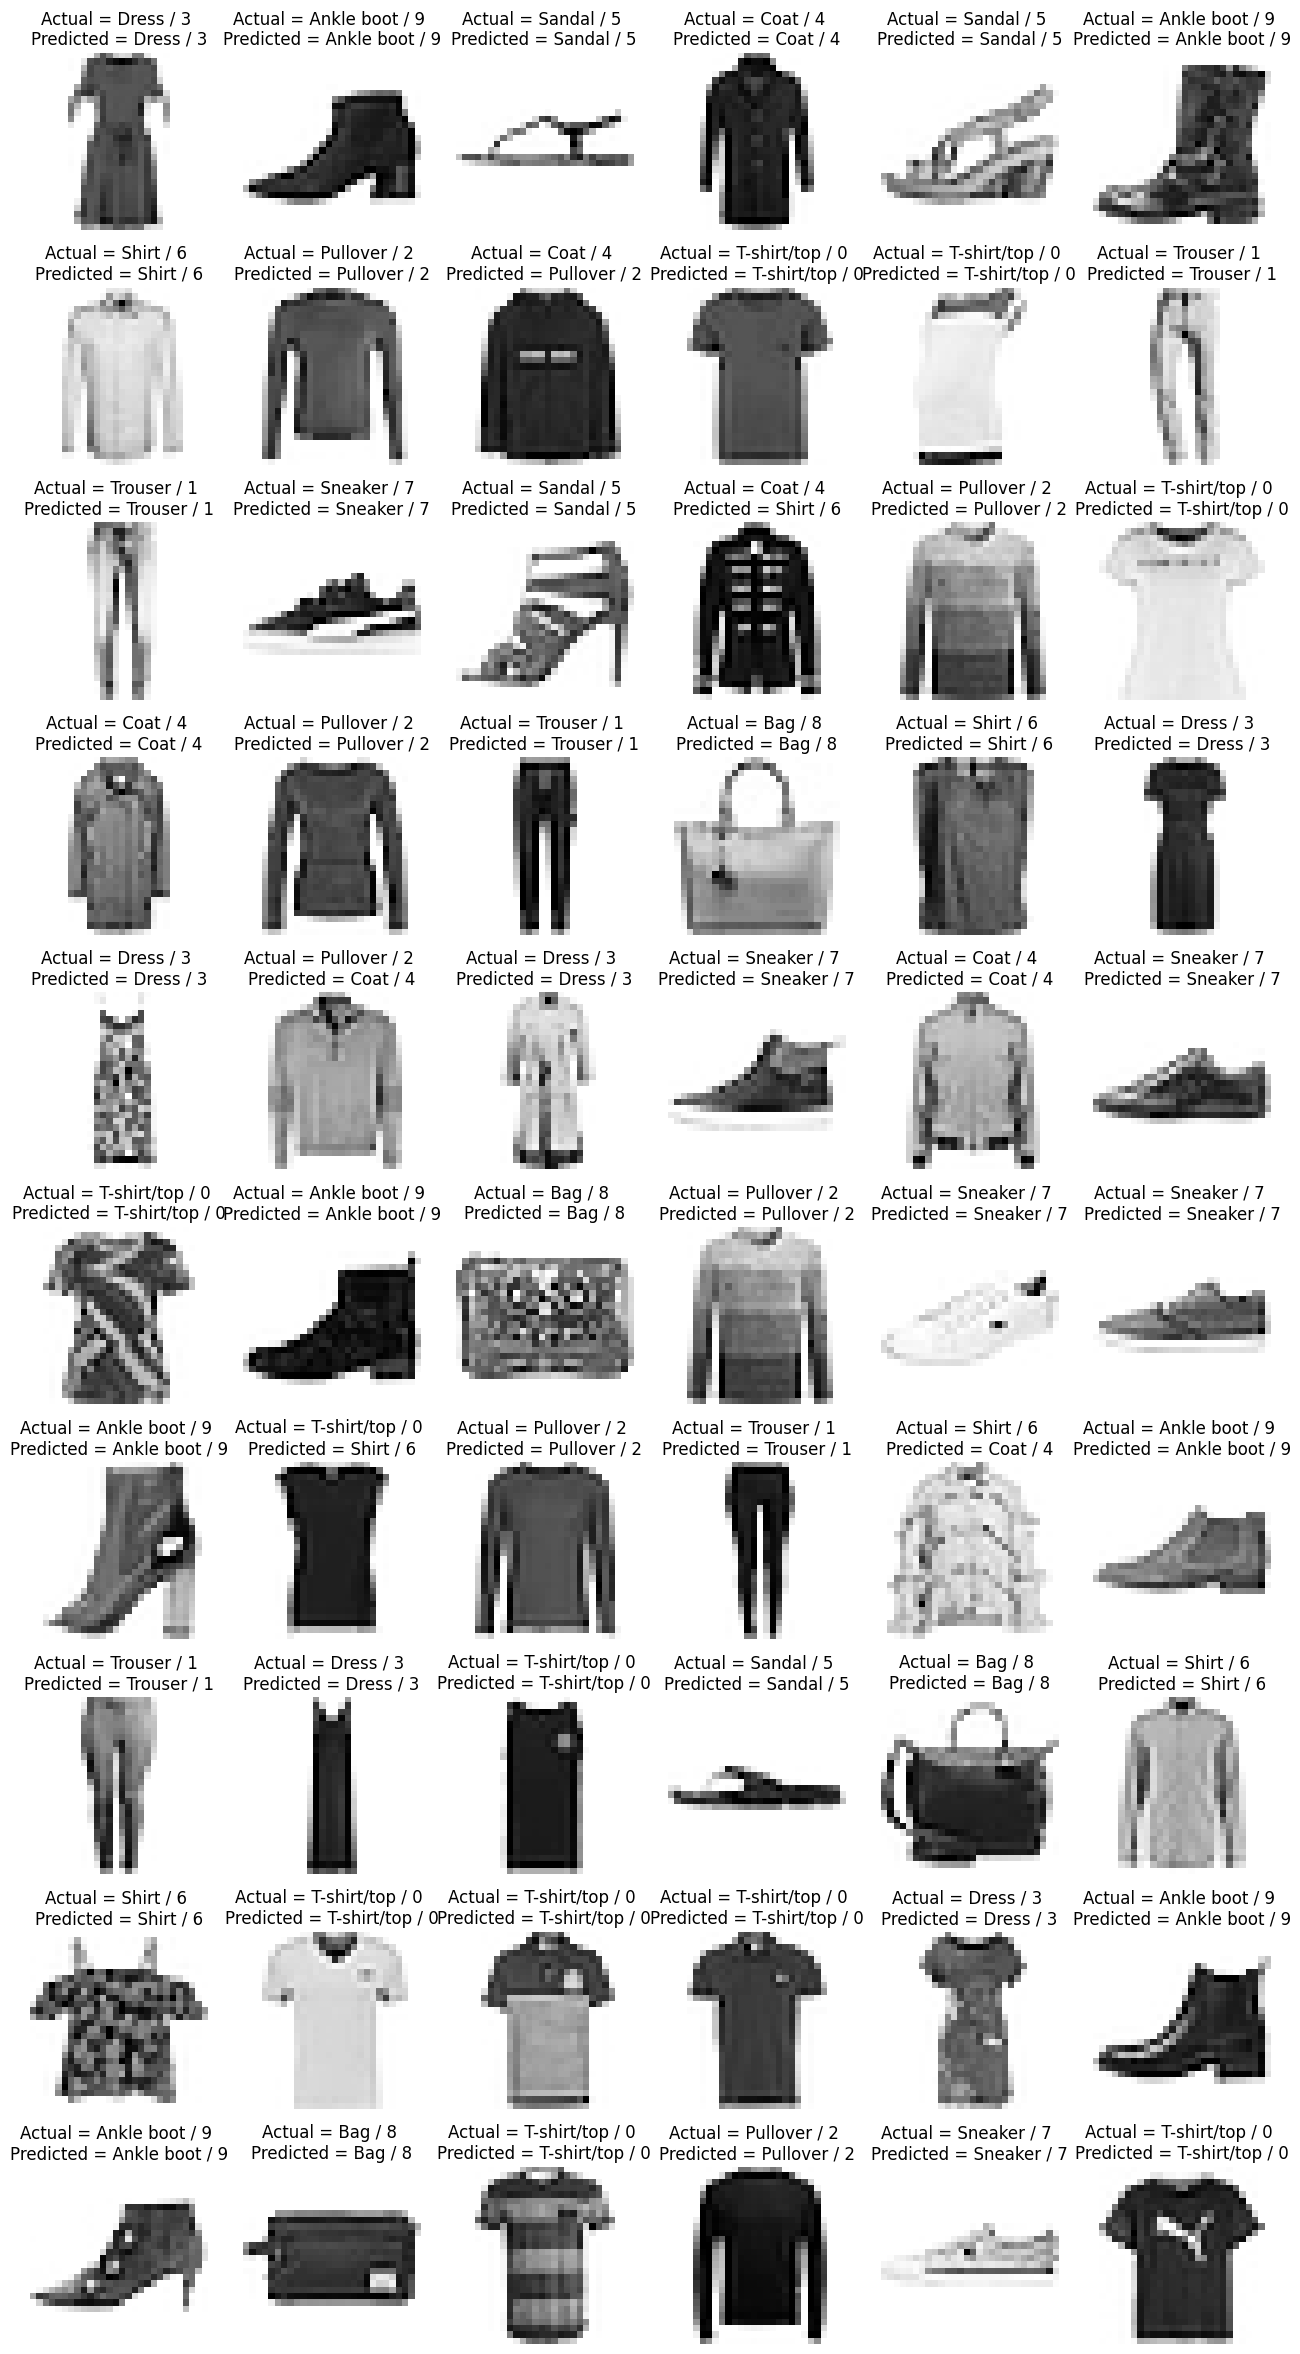

In [96]:
plt.figure(figsize=(16,30))

j=1
for i in np.random.randint(0, 1000,60):
  plt.subplot(10,6, j); j+=1
  plt.imshow(X_test[i].reshape(28,28), cmap = 'Greys')
  plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(class_labels[y_test[i]], y_test[i], class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
  plt.axis('off')

<Axes: >

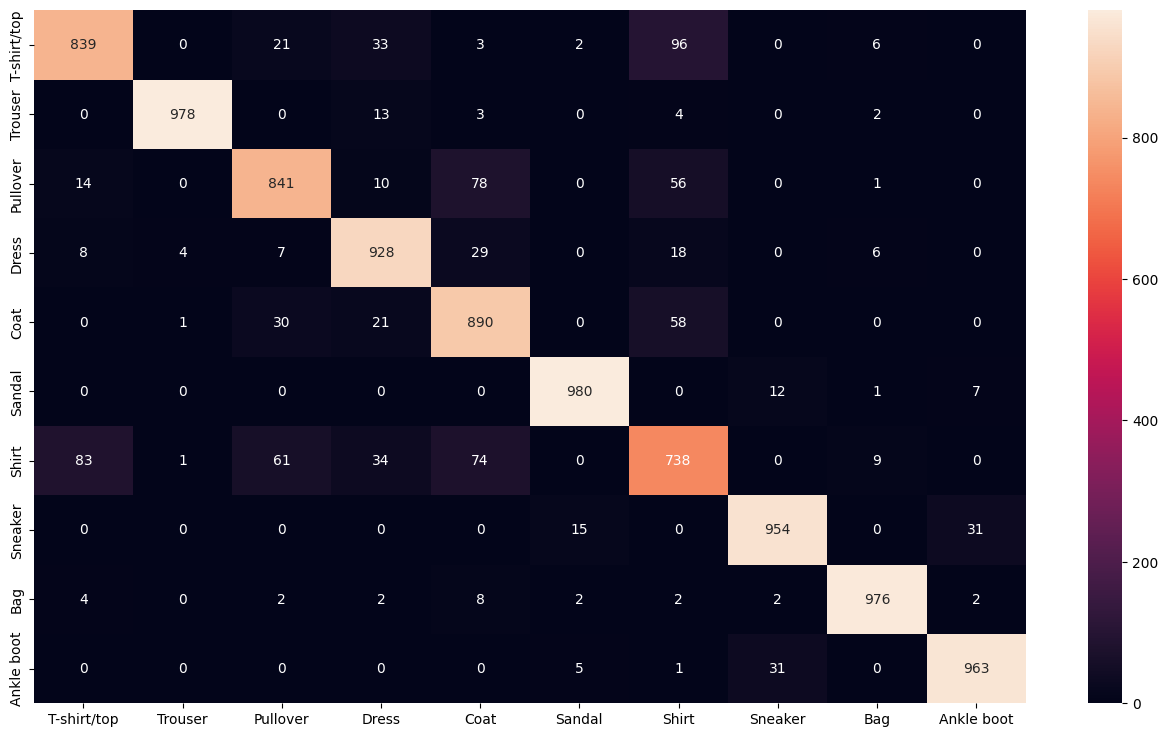

In [97]:
plt.figure(figsize=(16,9))
y_pred_labels = [ np.argmax(label) for label in y_pred ]
cm = confusion_matrix(y_test, y_pred_labels)

# show cm
sns.heatmap(cm, annot=True, fmt='d',xticklabels=class_labels, yticklabels=class_labels)

In [98]:
cnn_model2.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3202 - accuracy: 0.9087


[0.32017919421195984, 0.9086999893188477]

In [99]:
cr= classification_report(y_test, y_pred_labels, target_names=class_labels)
print(cr)

              precision    recall  f1-score   support

 T-shirt/top       0.89      0.84      0.86      1000
     Trouser       0.99      0.98      0.99      1000
    Pullover       0.87      0.84      0.86      1000
       Dress       0.89      0.93      0.91      1000
        Coat       0.82      0.89      0.85      1000
      Sandal       0.98      0.98      0.98      1000
       Shirt       0.76      0.74      0.75      1000
     Sneaker       0.95      0.95      0.95      1000
         Bag       0.98      0.98      0.98      1000
  Ankle boot       0.96      0.96      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [100]:
cnn_model2.save('fashion_mnist_cnn_model2.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [101]:
cnn_model3 = keras.models.Sequential([
                         keras.layers.Conv2D(filters=64, kernel_size=3, strides=(1,1), padding='valid',activation= 'relu', input_shape=[28,28,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=128, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=256, activation='relu'),
                         keras.layers.Dropout(0.5),
                         keras.layers.Dense(units=256, activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dropout(0.10),
                         keras.layers.Dense(units=10, activation='softmax')
                         ])

In [79]:
cnn_model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 13, 13, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 7, 7, 128)         73856     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 3, 3, 128)         0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 2, 2, 64)          73792     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 1, 1, 64)         

In [80]:
cnn_model3.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [81]:
cnn_model3.fit(X_train, y_train, epochs=50, batch_size=512, verbose=1, validation_data=(X_validation, y_validation))

Epoch 1/50
94/94 [==============================] - 5s 23ms/step - loss: 1.2178 - accuracy: 0.5102 - val_loss: 0.6182 - val_accuracy: 0.7583
Epoch 2/50
94/94 [==============================] - 1s 16ms/step - loss: 0.5980 - accuracy: 0.7714 - val_loss: 0.4857 - val_accuracy: 0.8095
Epoch 3/50
94/94 [==============================] - 2s 16ms/step - loss: 0.4906 - accuracy: 0.8161 - val_loss: 0.4307 - val_accuracy: 0.8396
Epoch 4/50
94/94 [==============================] - 2s 16ms/step - loss: 0.4287 - accuracy: 0.8428 - val_loss: 0.3726 - val_accuracy: 0.8653
Epoch 5/50
94/94 [==============================] - 2s 17ms/step - loss: 0.3782 - accuracy: 0.8630 - val_loss: 0.3551 - val_accuracy: 0.8711
Epoch 6/50
94/94 [==============================] - 2s 17ms/step - loss: 0.3363 - accuracy: 0.8809 - val_loss: 0.3133 - val_accuracy: 0.8874
Epoch 7/50
94/94 [==============================] - 1s 16ms/step - loss: 0.3137 - accuracy: 0.8889 - val_loss: 0.3066 - val_accuracy: 0.8907
Epoch 8/50
94

In [83]:
cnn_model3.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.4787 - accuracy: 0.9001


[0.4786972105503082, 0.9000999927520752]

In [102]:
y_pred = cnn_model3.predict(X_test)
y_pred.round(2)

313/313 [==============================] - 1s 3ms/step


array([[0.1, 0.1, 0.1, ..., 0.1, 0.1, 0.1],
       [0.1, 0.1, 0.1, ..., 0.1, 0.1, 0.1],
       [0.1, 0.1, 0.1, ..., 0.1, 0.1, 0.1],
       ...,
       [0.1, 0.1, 0.1, ..., 0.1, 0.1, 0.1],
       [0.1, 0.1, 0.1, ..., 0.1, 0.1, 0.1],
       [0.1, 0.1, 0.1, ..., 0.1, 0.1, 0.1]], dtype=float32)

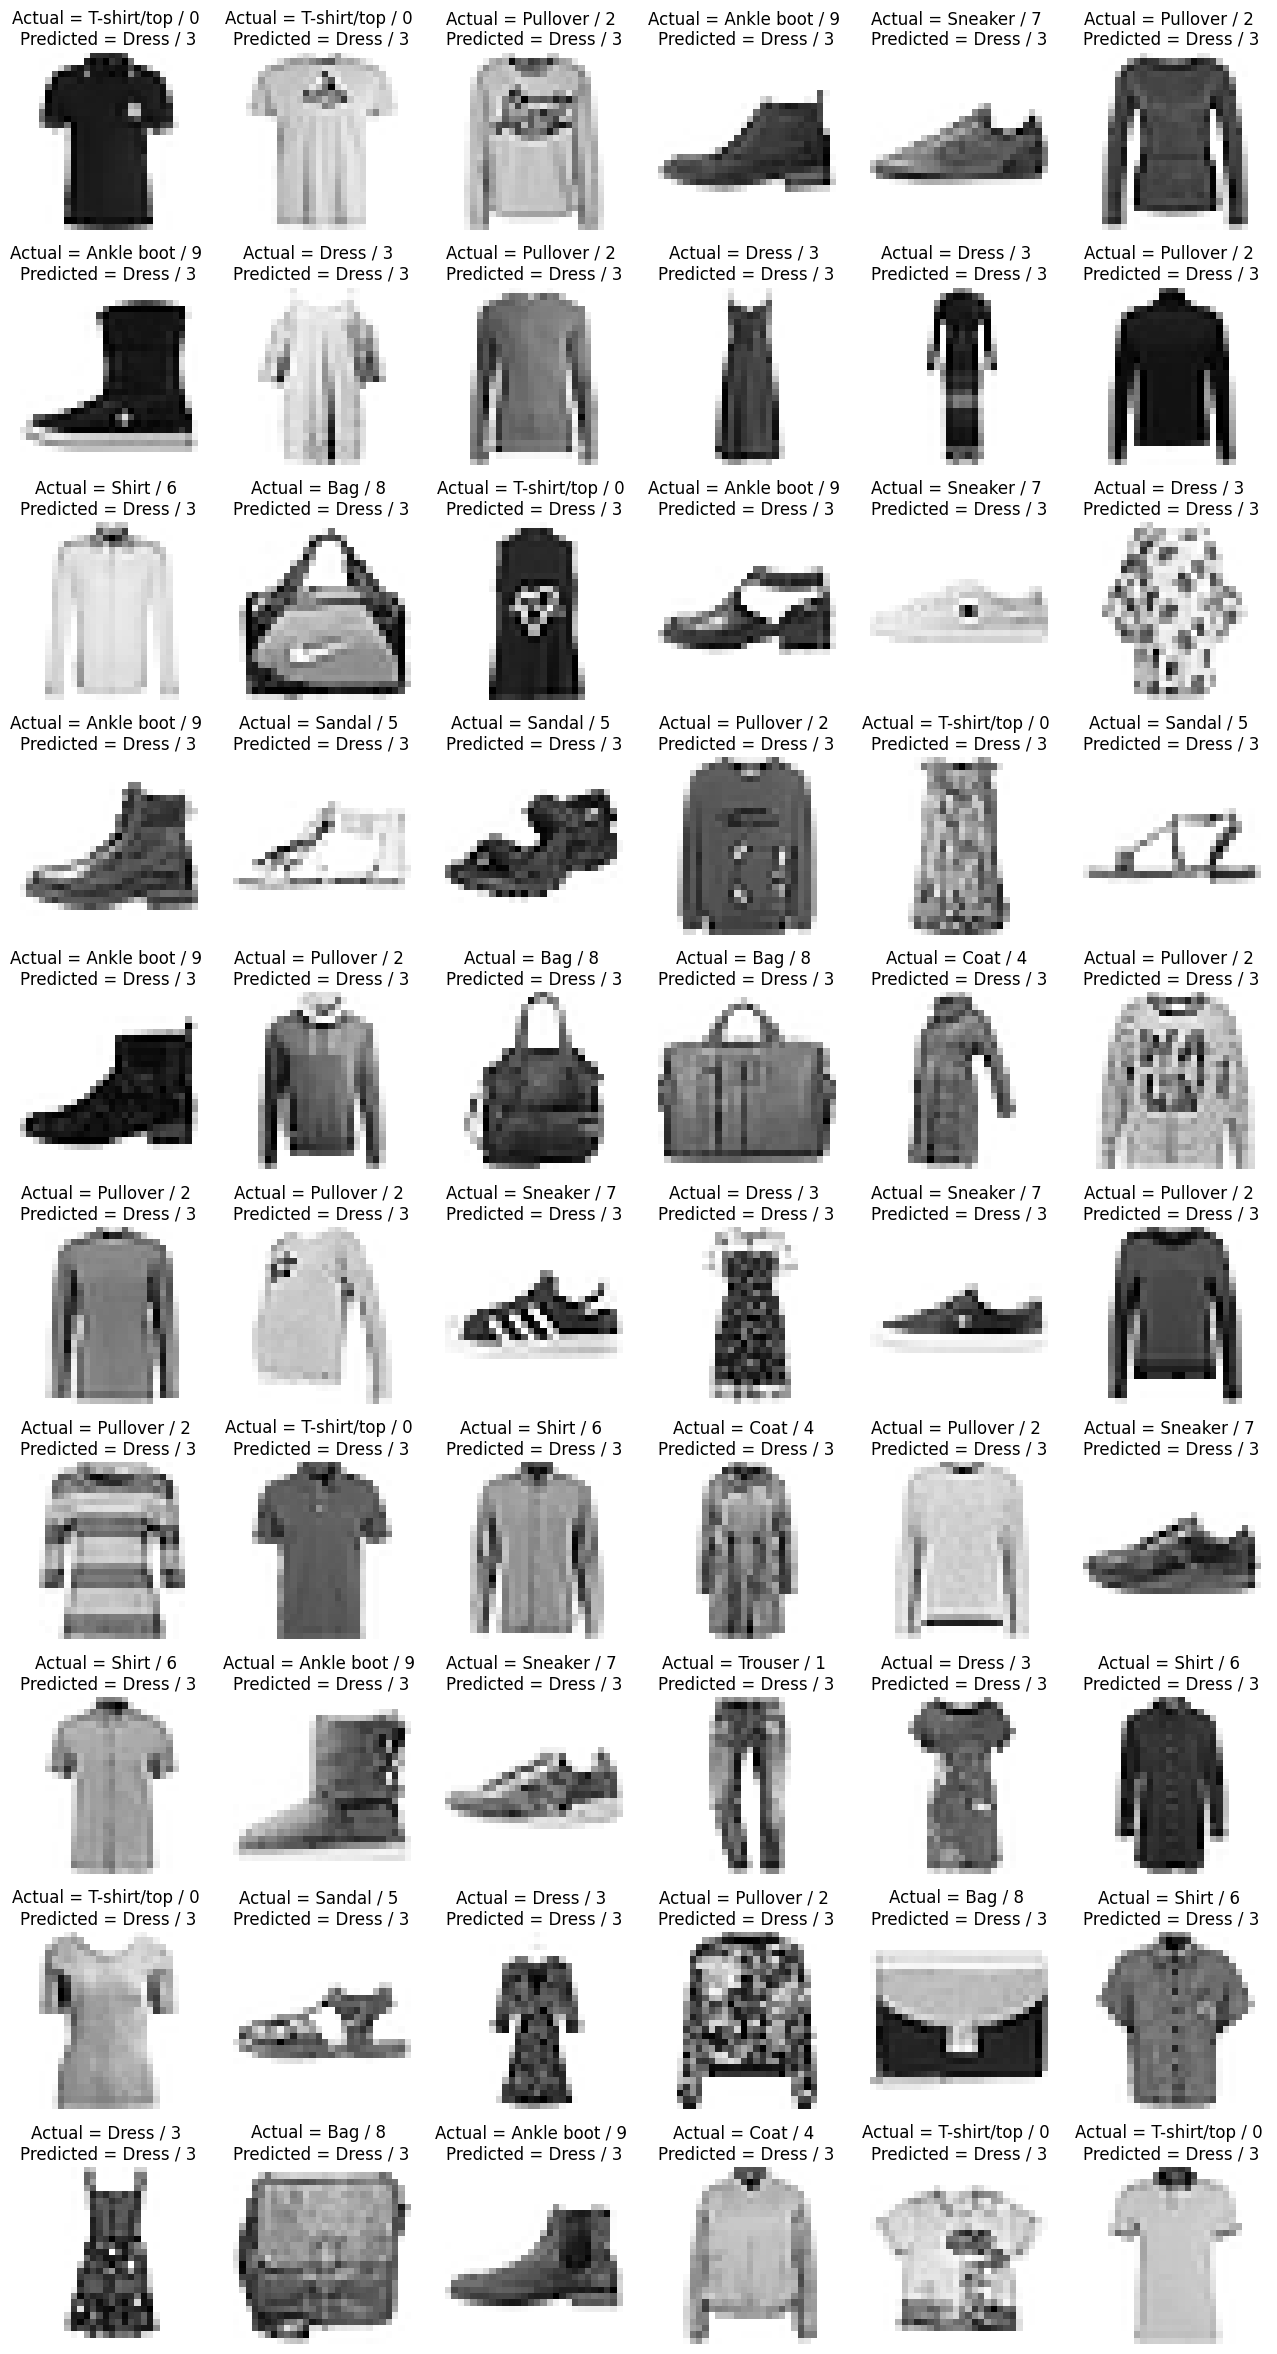

In [103]:
plt.figure(figsize=(16,30))

j=1
for i in np.random.randint(0, 1000,60):
  plt.subplot(10,6, j); j+=1
  plt.imshow(X_test[i].reshape(28,28), cmap = 'Greys')
  plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(class_labels[y_test[i]], y_test[i], class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
  plt.axis('off')

In [104]:
cr= classification_report(y_test, y_pred_labels, target_names=class_labels)
print(cr)

              precision    recall  f1-score   support

 T-shirt/top       0.89      0.84      0.86      1000
     Trouser       0.99      0.98      0.99      1000
    Pullover       0.87      0.84      0.86      1000
       Dress       0.89      0.93      0.91      1000
        Coat       0.82      0.89      0.85      1000
      Sandal       0.98      0.98      0.98      1000
       Shirt       0.76      0.74      0.75      1000
     Sneaker       0.95      0.95      0.95      1000
         Bag       0.98      0.98      0.98      1000
  Ankle boot       0.96      0.96      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [82]:
cnn_model3.save('fashion_mnist_cnn_model3.h5')